<a href="https://colab.research.google.com/github/Sahilldiwan/Diwali_Sales_Analysis/blob/main/Diwali_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Diwali Sales Analysis**

# Objective:

Improve Customer Experience by Analyzing
Sales Data

Increase Revenue


# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Dataset Loading

In [ ]:
df=pd.read_csv('/content/Diwali Sales Data.csv',encoding= 'unicode_escape')

In [ ]:
df.shape
#data set have 11251 Rows and 15 columns

(11251, 15)

# Dataset First View

In [ ]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


# Dataset Information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [ ]:
# droping unnecassary columns
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [ ]:
df.shape

(11251, 13)

# Null Values

In [ ]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [ ]:
#droping the null value
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [ ]:
# changing data types
df['Amount']=df['Amount'].astype(int)

In [ ]:
df['Amount'].dtypes

dtype('int64')

# Statistical Summary

In [ ]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


# **Exploratory Data Analysis**

In [ ]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877


# **Gender vs Their Count**

In [ ]:
df['Gender'].value_counts()

F    7832
M    3407
Name: Gender, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

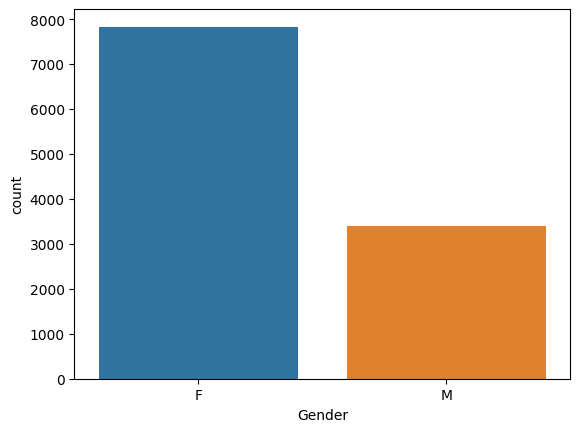

In [ ]:
sns.countplot(x='Gender',data=df,)

# Insights

We Have Found That The Count of Female is 7832 and Male is 3407.

So, Female has done more Shopping Than Male.

# **Gender Who Spend Maximum Amount**

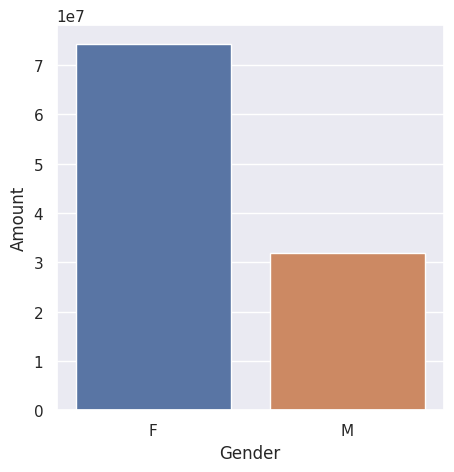

In [ ]:
s_amount=df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(5,5)})
sns.barplot(x='Gender',y='Amount',data=s_amount)
plt.show()

# Insights:

We Can Found Out That Women Had Spend More Amount On Shopping

# **Age Group and Amount Spend By Them**

In [ ]:
df['Age Group'].value_counts()

26-35    4541
36-45    2283
18-25    1879
46-50     983
51-55     830
55+       427
0-17      296
Name: Age Group, dtype: int64

<Axes: xlabel='Age Group', ylabel='count'>

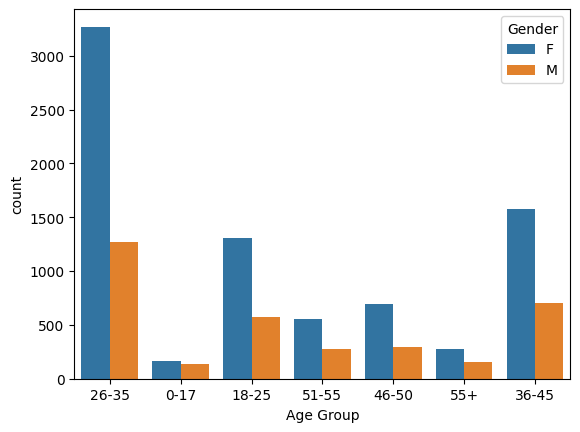

In [ ]:
sns.countplot(x="Age Group",data=df,hue='Gender')

# Insights:

Age Group 26-35 Have Max No of Orders and In This Age group Female are Having Max Orders

<Axes: xlabel='Age Group', ylabel='Amount'>

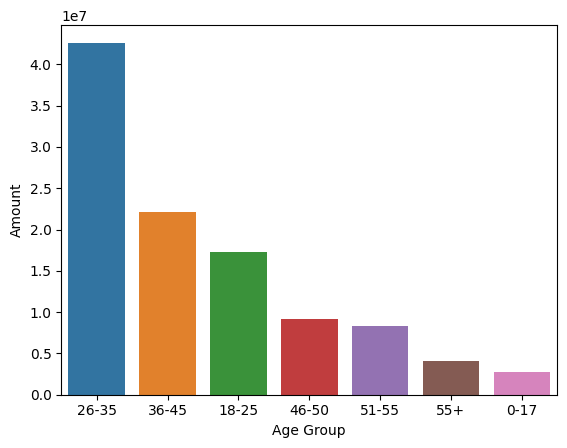

In [ ]:
#age group and amount
age_amount=df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Age Group',y='Amount',data=age_amount)

# Insights

Age Group Spend More Amount on Shopping

# **Top 10 States With Maximum Number of Orders**

In [ ]:
#total number of orders from top 10 states
df.groupby(['State'],as_index=False)['Orders'].sum()

,State,Orders
0,Andhra Pradesh,2051
1,Bihar,1062
2,Delhi,2740
3,Gujarat,1066
4,Haryana,1109
5,Himachal Pradesh,1568
6,Jharkhand,953
7,Karnataka,3240
8,Kerala,1137
9,Madhya Pradesh,2252


<Axes: xlabel='State', ylabel='Orders'>

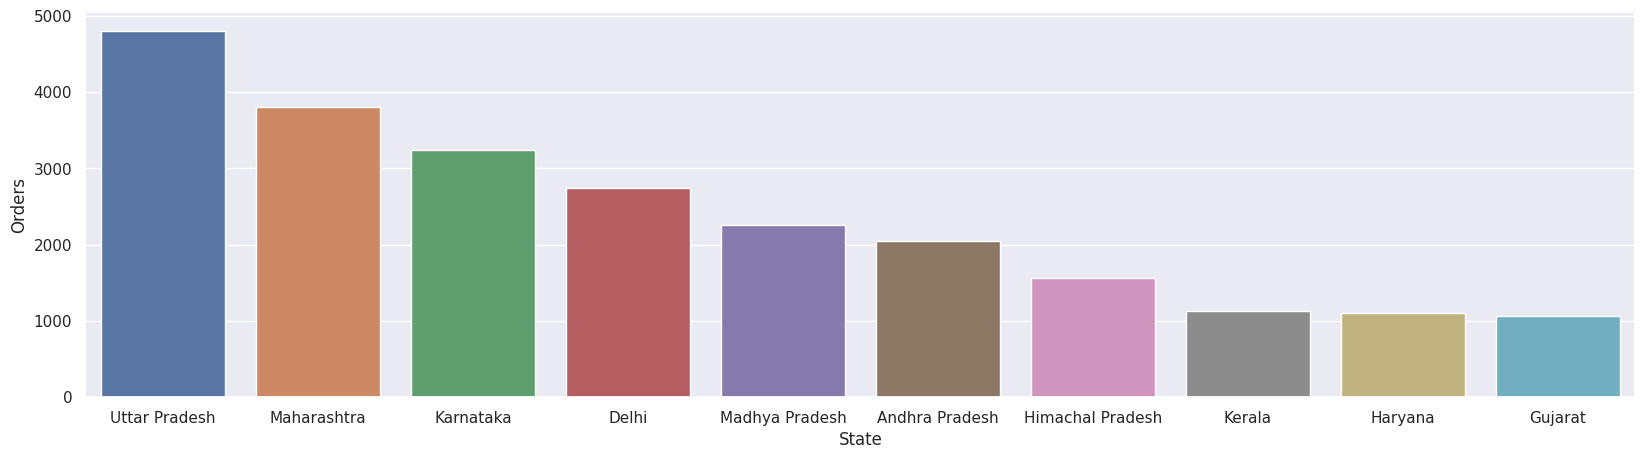

In [ ]:
sales_state=df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=sales_state,x='State',y='Orders')


# Insights

Uttar Pradesh is in Top with Max Orders

<Axes: xlabel='State', ylabel='Amount'>

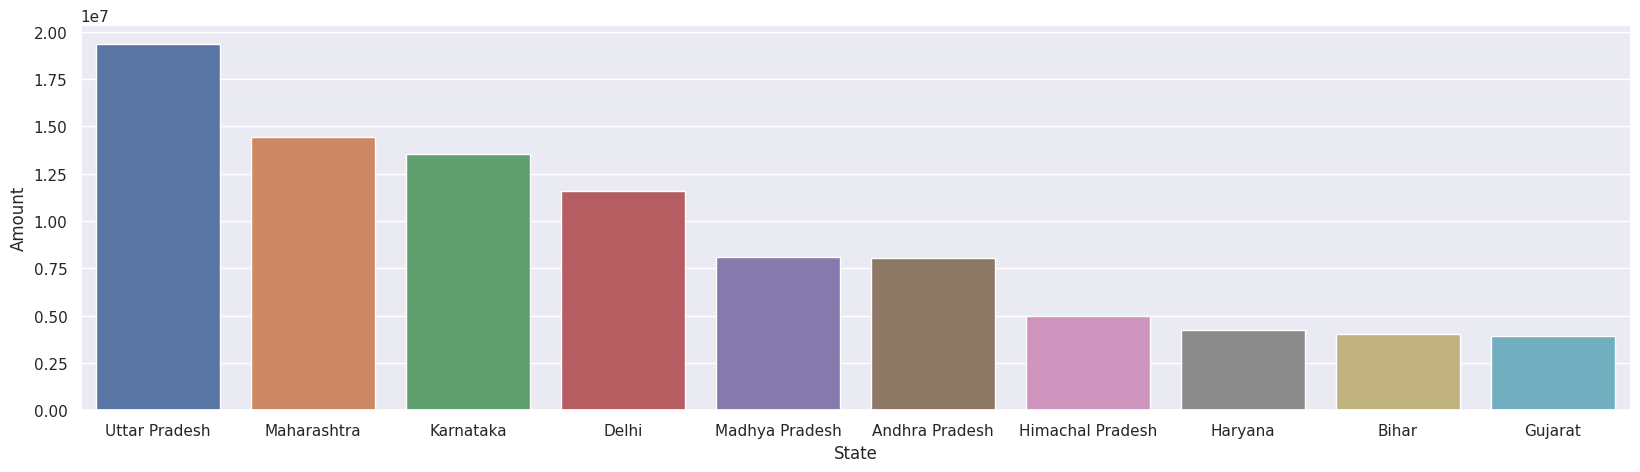

In [ ]:
state_amount=df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.barplot(x='State',y='Amount',data=state_amount)

# Insights

In above Graph we have seen That kerala and Haryana are in 8 and 9 spot.

 but in Amount spent by State Haryana is at 8 and Bihar is at 9 spot


In [ ]:
df['Occupation'].value_counts()

IT Sector          1583
Healthcare         1408
Aviation           1310
Banking            1137
Govt                854
Hospitality         703
Media               637
Automobile          565
Chemical            541
Lawyer              531
Retail              501
Food Processing     423
Construction        414
Textile             349
Agriculture         283
Name: Occupation, dtype: int64

# **Occupation and Orders**

<Axes: >

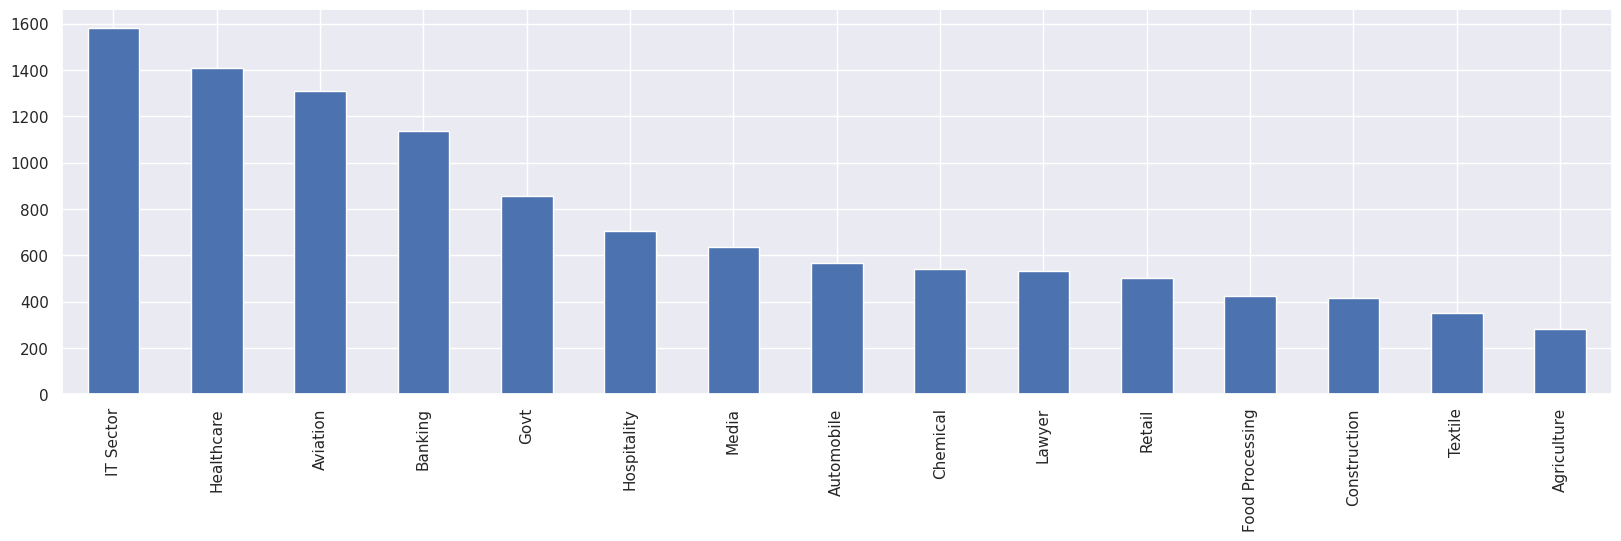

In [ ]:
df['Occupation'].value_counts().plot(kind='bar')

# Insights

IT Sector,HealthCare,Aviation,Banking Sectors are Placing Maximum Orders

<Axes: xlabel='Occupation', ylabel='Amount'>

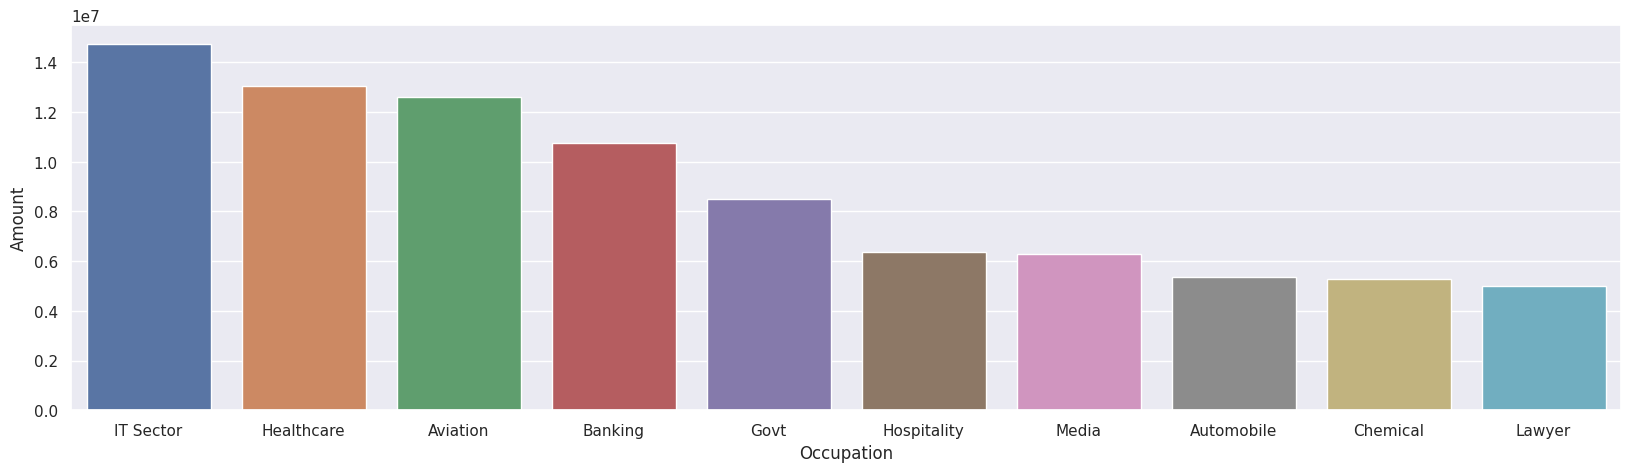

In [ ]:
state_amount=df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x='Occupation',y='Amount',data=state_amount)

# Insights

IT Sectors are Spending Max Amount

# **Product Category Orders**

<Axes: >

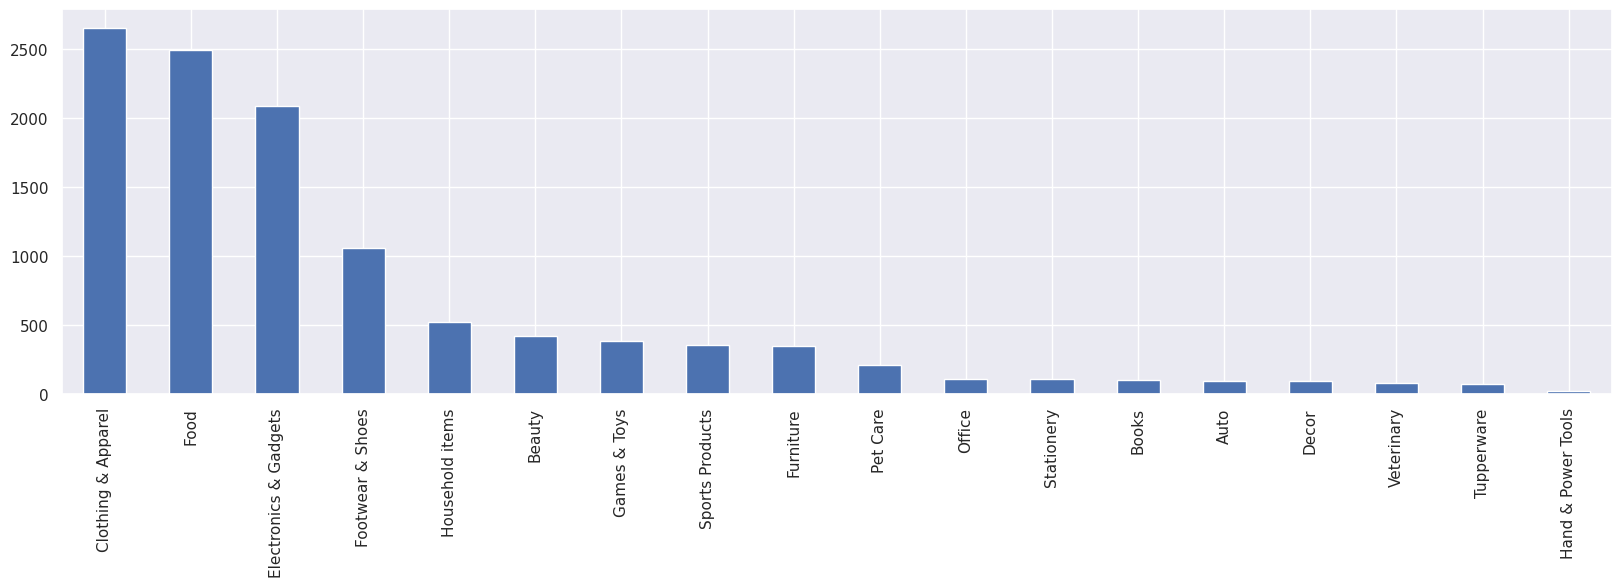

In [ ]:
df['Product_Category'].value_counts().plot(kind='bar')

# Insights

Clothing,Food and Electronics are The Top Product_Category with Max Orders

# **Product Category and Amount**

<Axes: xlabel='Product_Category', ylabel='Amount'>

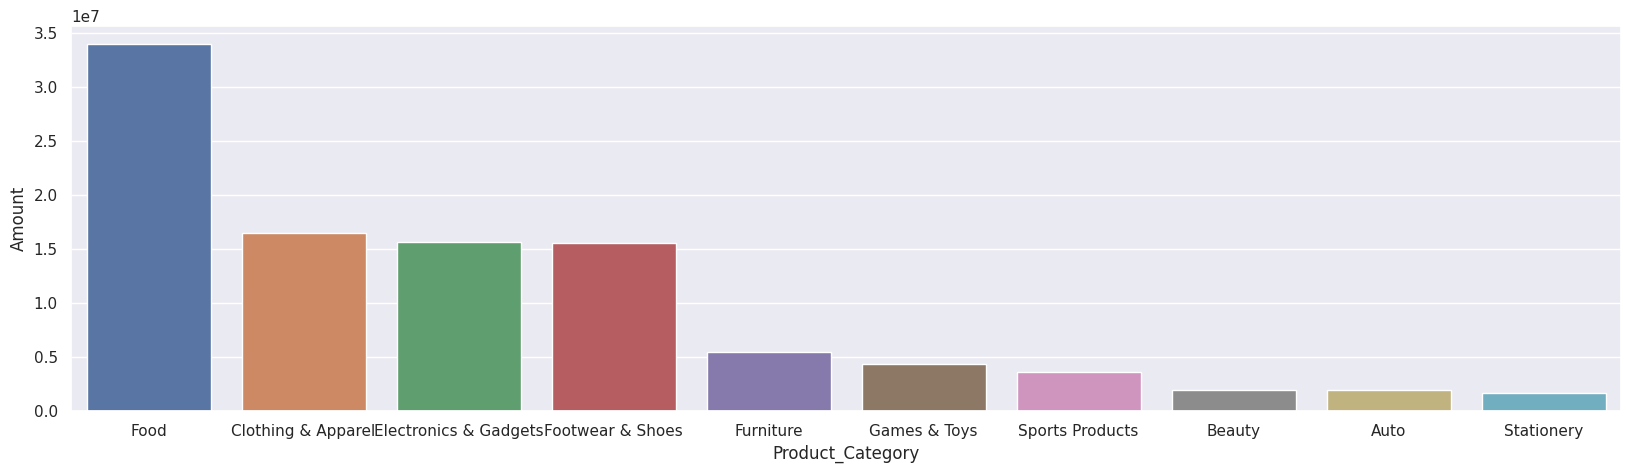

In [ ]:
categoryamount=df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x='Product_Category',y='Amount',data=categoryamount)

# Insights

In Above Graph we Have Seen That Clothing was in 1st Place in orders
but in Amount Food is in Spot 1

# **Marital status**

<Axes: ylabel='Marital_Status'>

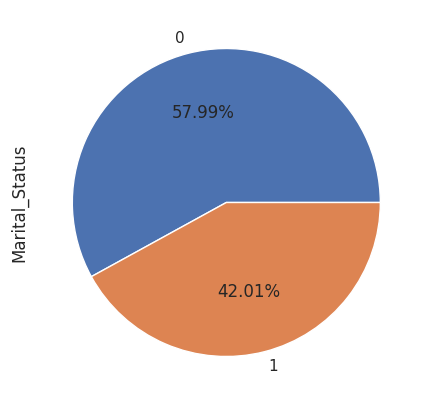

In [ ]:
df['Marital_Status'].value_counts().plot(kind='pie',autopct='%.2f%%')

# Insight

42.01% people in our data have Marital Status Yes

# **Conclusion**
We Have Found That the Female are Placing More Number of Orders.

Age Group 26-35 are Spending Maximum Amount.

Uttar Pradesh State is Highest in placing Orders and Amount.

People in Occupation IT Sectoris Highest in placing Orders and Amount.

People in Food are Spending More Amount.
